In [29]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

params = {
    'figure.figsize': (8.5, 6.5),
    'font.style': 'normal',
    'axes.labelsize': 25,
    'font.size': 16,
    'legend.fontsize': 11,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 8,
    'ytick.major.size': 10,
    'xtick.minor.size': 4,
    'ytick.minor.size': 4,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'font.family': 'serif',
    'legend.framealpha': 1,  # Set legend alpha to 1
    'legend.borderpad': 0.2,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True
}
plt.rcParams.update(params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


--------- Quadratic Example -----------

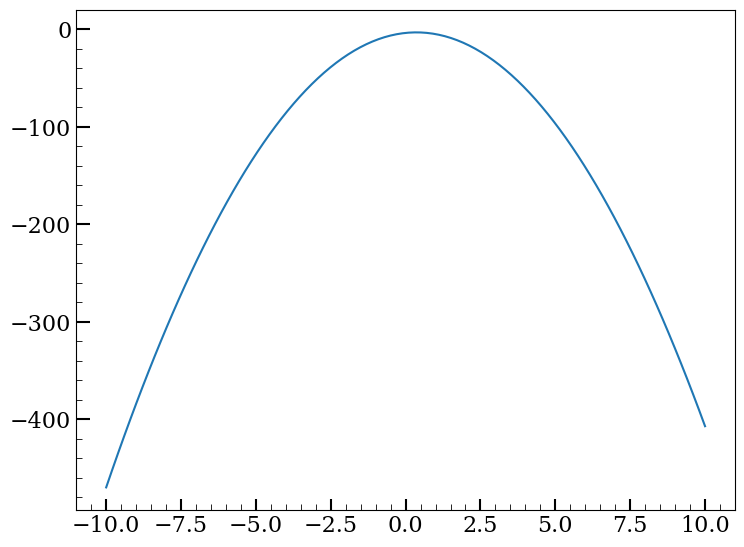

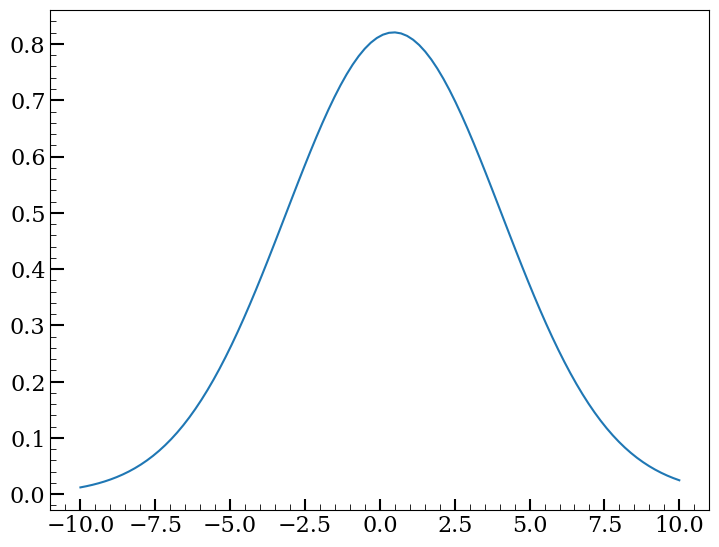

In [21]:
def gaussian_function(x, a, b, c):
    return a * np.exp(-((x - b) ** 2) / (2 * c ** 2))


def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

# def data_generator(function, x_range, num_points, **kwargs):
#     x = np.linspace(x_range[0], x_range[1], num_points)
#     y = function(x, **kwargs)
#     return x, y

def data_generator_quadratic():
    x = np.linspace(-10, 10, 100)


    a, b, c = np.random.uniform(-5, 5, size=3)
    fun = quadratic_function(x, a, b, c)


    return (x, np.asarray(fun)), [a, b, c]


def data_generator_gaussian():
    x = np.linspace(-10, 10, 100)

    a, b, c = np.random.uniform(0.1, 5, size=3)
    fun = gaussian_function(x, a, b, c)

    return (x, np.asarray(fun)), [a, b, c]


x, default = data_generator_quadratic()
x_gaus, default_gaus = data_generator_gaussian()

plt.plot(x[0], x[1])
plt.show()
plt.plot(x_gaus[0], x_gaus[1])
plt.show()

In [22]:
default_args = {
    'allowed_symbols': "pow,add,sub,mul,aq,constant,variable",
    'epsilon': 10**(-4),
    'objectives': ['r2', 'length'],
    'max_evaluations': 100000000,
    'max_length': 100,
    'max_time': 1800,
    'n_threads': 10
}

name = "Quadratic Function Problem"

train, default_coeff_train = data_generator_quadratic()
test, default_coeff_test = data_generator_quadratic()


In [23]:
from main import Problem
Problem_ = Problem(name, train, test, default_args)

<Axes: title={'center': 'Quadratic Function Problem train'}, xlabel='X-axis', ylabel='Y-axis'>

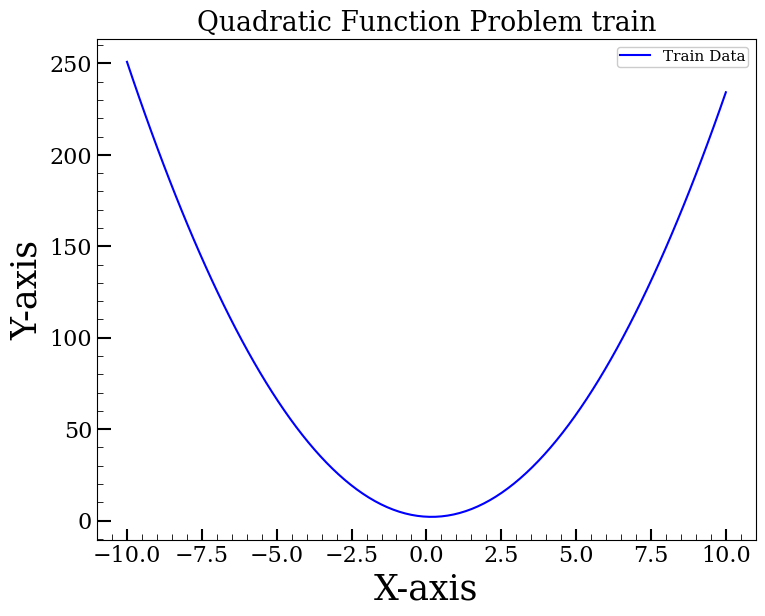

In [24]:
Problem_.plot_data(train=True)

In [25]:
Problem_.solve()

dict_keys(['model', 'variables', 'length', 'complexity', 'tree', 'objective_values', 'mean_squared_error', 'minimum_description_length', 'bayesian_information_criterion', 'akaike_information_criterion']) <class 'dict'>
[-0.004384157247841358, 5.0], 267524.75, (83.880638122559 + (3.523375749588 * ((-0.236189290881) * X1))), 5348.21
[-0.9956158399581909, 7.0], 1306.53, (2.104957580566 + ((-52.558898925781) * (((-0.280176639557) * X1) * (0.163298085332 * X1)))), 23.55
[-1.0, 9.0], 141.22, (2.105076074600 + ((-0.781379520893) * (((1.549193739891 * X1) * ((-1.986510396004) * X1)) - ((-1.065406084061) * X1)))), 0.00


<Axes: title={'center': 'Quadratic Function Problem: solution 2 Train'}>

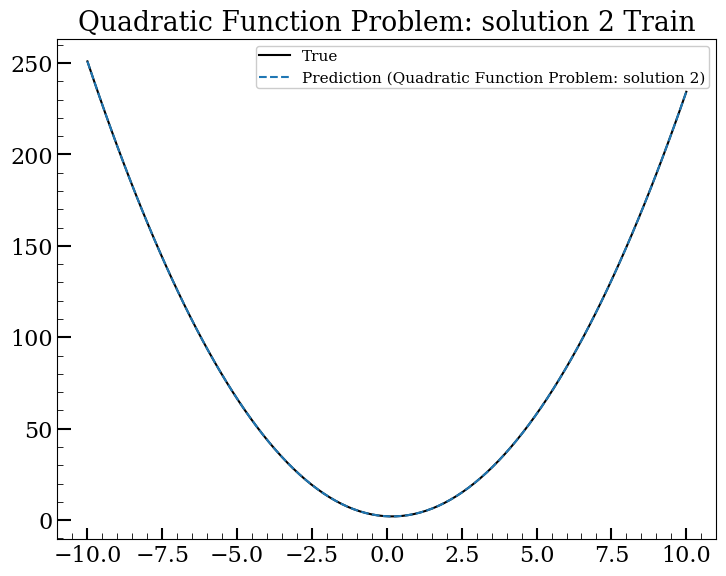

In [26]:
Problem_.solutions[-1].plot_results()

In [27]:
Problem_.solutions[-1].display_expression(), Problem_.solutions[-1].extract_and_format()

<IPython.core.display.Math object>

(None,
 ('X1*b3 + X1**b2*b1 + b0',
  {'b0': 2.1050760746,
   'b1': 2.404687247401338,
   'b2': 2.0,
   'b3': -0.8324864955200715},
  X1*b3 + X1**b2*b1 + b0))

<Axes: title={'center': 'Quadratic Function Problem - Length vs MSE'}, xlabel='Length', ylabel='MSE'>

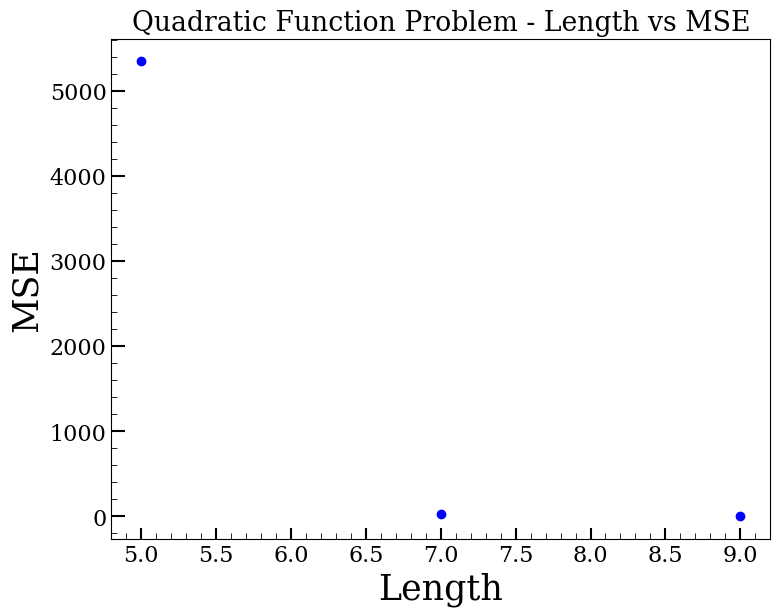

In [30]:
Problem_.plot_l_vs_mse()

-------- Gaussian Example ----------

In [31]:
name_g = "Gaussian Function Problem"

gaussian_args = {
    'allowed_symbols': "add,sub,mul,aq,constant,variable,exp",
    'epsilon': 10**(-4),
    'objectives': ['r2', 'length'],
    'max_evaluations': 100000000,
    'max_length': 100,
    'max_time': 1800,
    'n_threads': 10
}


train_g, default_coeff_train_g = data_generator_gaussian()
test_g, default_coeff_test_g = data_generator_gaussian()

Problem_g = Problem(name_g, train_g, test_g, gaussian_args)

<Axes: title={'center': 'Gaussian Function Problem train'}, xlabel='X-axis', ylabel='Y-axis'>

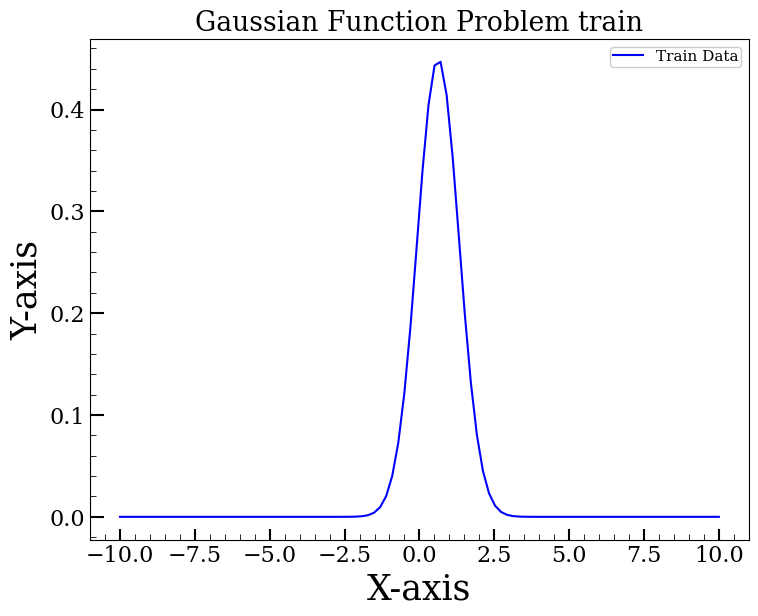

In [32]:
Problem_g.plot_data(train=True)

In [33]:
Problem_g.solve()

dict_keys(['model', 'variables', 'length', 'complexity', 'tree', 'objective_values', 'mean_squared_error', 'minimum_description_length', 'bayesian_information_criterion', 'akaike_information_criterion']) <class 'dict'>
[-0.0016035805456340313, 5.0], 100.49, (0.038932766765 + ((-0.004819016438) * ((-0.148562937975) * X1))), 0.01
[-0.038516417145729065, 6.0], 103.64, (0.053192436695 + ((-0.004139412194) * exp(((-0.301594376564) * X1)))), 0.01
[-0.6356541514396667, 7.0], 104.38, ((-0.043427828699) + ((-5.029954910278) * ((-0.076182968915) / (sqrt(1 + (1.602028131485 * X1) ^ 2))))), 0.00
[-0.6825350522994995, 8.0], 109.18, ((-0.001098316396) + (0.318749338388 * exp((((-0.346158385277) * X1) * (1.409902930260 * X1))))), 0.00
[-0.9502751231193542, 9.0], 113.02, ((-0.002314524725) + (1.022544264793 * exp((((-1.086931228638) * X1) - exp(((-2.259193181992) * X1)))))), 0.00
[-0.9999997019767761, 10.0], 114.23, (0.000013530136 + (0.301018685102 * exp(((0.892074227333 - (0.713555753231 * X1)) * (1

<Axes: title={'center': 'Gaussian Function Problem - Length vs MSE'}, xlabel='Length', ylabel='MSE'>

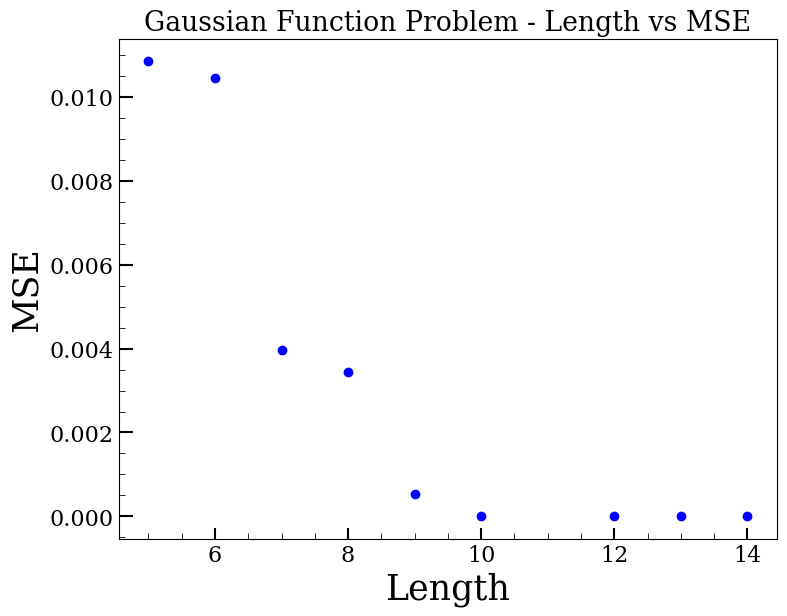

In [34]:
Problem_g.plot_l_vs_mse()

In [35]:
n=7
Problem_g.solutions[n].display_expression(), Problem_g.solutions[n].extract_and_format()
#Problem_g.solutions[n].plot_results()

<IPython.core.display.Math object>

(None,
 ('b0 + b1*exp(X1*b2)*exp(X1**b4*b3)',
  {'b0': 1.3525282e-05,
   'b1': 0.300908595324,
   'b2': 1.2875761060833886,
   'b3': -1.0294433328410948,
   'b4': 2.0},
  b0 + b1*exp(X1*b2)*exp(X1**b4*b3)))

In [36]:
Problem_g.solutions[n].to_latex()

('b_{0} + b_{1} e^{X_{1} b_{2}} e^{X_{1}^{b_{4}} b_{3}}',
 {'b0': 1.3525282e-05,
  'b1': 0.300908595324,
  'b2': 1.2875761060833886,
  'b3': -1.0294433328410948,
  'b4': 2.0})